In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data loading and inspection**

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['cp'].unique()

array([3, 2, 1, 0])

**Data Descriptions**
  * **`Age`: Age of the person**
  * **`sex`: Gender of the person (Male = 1, and Female = 0)**
  * **`cp`: Chest Pain (1 = Weak, 2 = Moderate, 3 = High, 4 = Unbearable)**
  * **`trestbps`: Resting Blood Pressure of a person**
  * **`chol`: The level of cholestrol**
  * **`fbs`: Blood Sugar Level (1 = High, 0 = Low)**
  * **`restecg`: Level of ECG (0 = Normal, 1 = Abnormality, 2 = Hyperabnormality)**
  * **`ca`: The number of blood vessels**
  * **`thalach`: the maximum heart rate achieved by the patient during exercise**
  * **`exang`: whether the person is having paiin (Yes = 1, and NO= 0)**
  * **`slope`: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).**
  * **`target`: If a person is having heart dieases (Yes = 1, No = 0)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

#used to cehck the outliers here

#skewness in age data-visualise the data to confirm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use("dark_background")

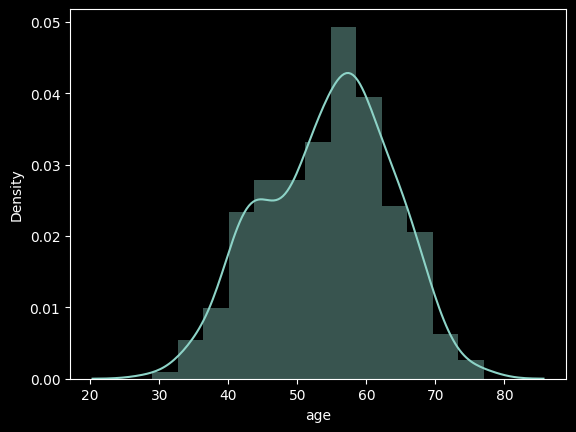

In [ ]:
sns.distplot(df['age']); #left skewed

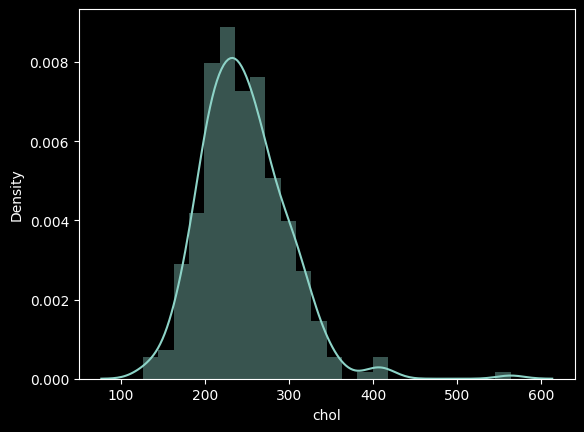

In [ ]:
sns.distplot(df['chol']);

**Outlier**

In [ ]:
#usually tree algorithm does not get much impacted by the outliers.
#So its not mandatory to remove the outliers here

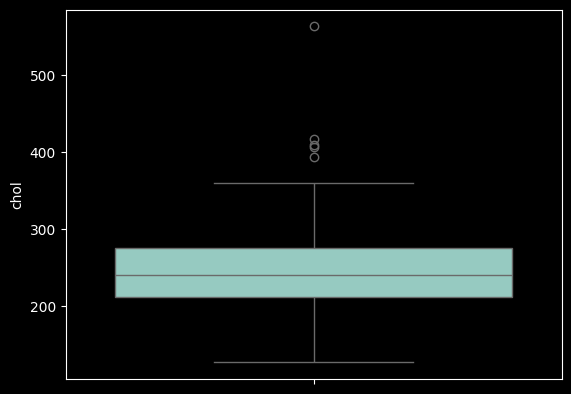

In [ ]:
sns.boxplot(df['chol']);

In [ ]:
Q1=df['chol'].quantile(0.25)
Q3=df['chol'].quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [ ]:
df[(df['chol']>=LL) & (df['chol']<=UL)].shape

#this is not saved - just showing how the outliers can be removed

(297, 14)

**Explore the target**

In [ ]:
df['target'].value_counts()

,count
target,
1,164
0,138


Insights

*   From the above analysis, it is clear that there is no class imbalancement.



In [ ]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
df[df['chol']>300].shape

(43, 14)

In [ ]:
plt.style.use('dark_background')

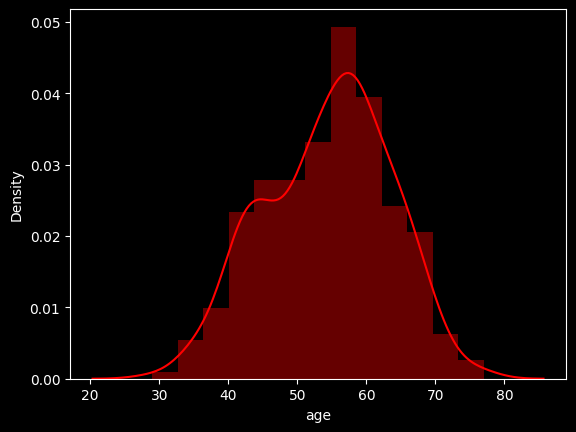

In [ ]:
sns.distplot(df['age'],color='red');

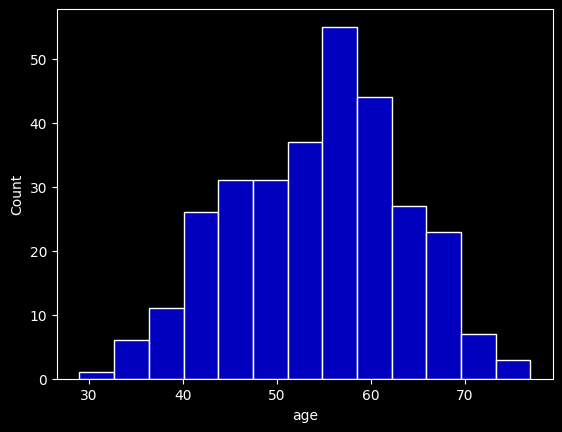

In [ ]:
sns.histplot(df['age'],color='blue');

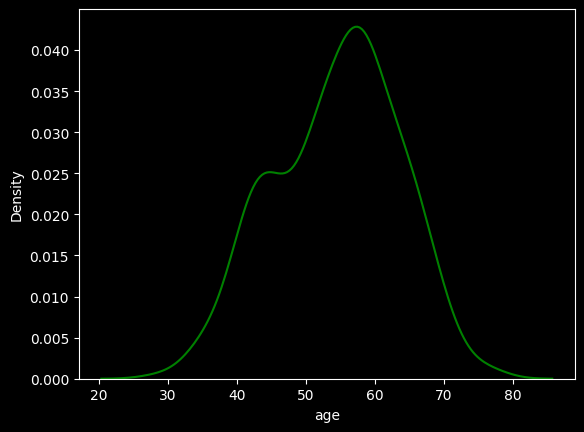

In [ ]:
sns.kdeplot(df['age'],color='green');

**Analyzing the distribution of age with respect to gender**

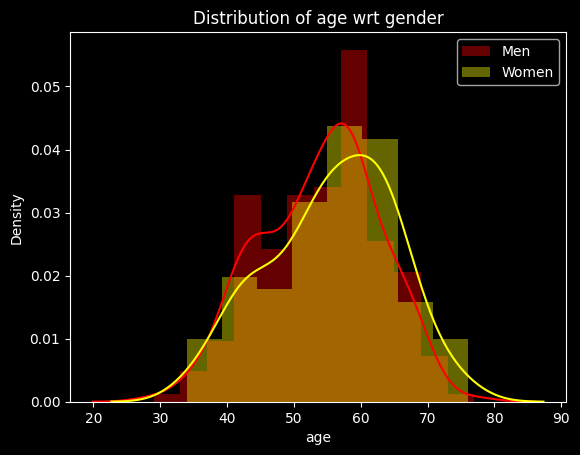

In [ ]:
sns.distplot(df[df['sex']==1]['age'],label='Men',color='red')
sns.distplot(df[df['sex']==0]['age'],label='Women',color='yellow')
plt.title('Distribution of age wrt gender')
plt.legend()
plt.show()

**Correlation check**

<Axes: >

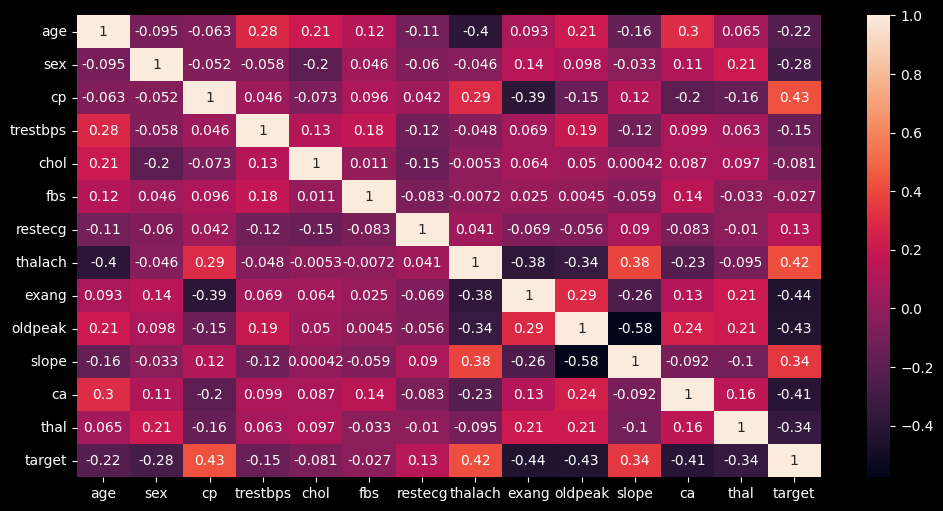

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

**Model building**

In [ ]:
#independent features
X=df.drop('target',axis=1)

#dependent features
y=df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
model=DecisionTreeClassifier()
#parameters used
'''criterion:{“gini”, “entropy”, “log_loss”}, default=”gini”
max_depth:int, default=None"
min_samples_split:int or float, default=2
The minimum number of samples required to split an internal node:'''

'criterion:{“gini”, “entropy”, “log_loss”}, default=”gini”\nmax_depth:int, default=None"\nmin_samples_split:int or float, default=2\nThe minimum number of samples required to split an internal node:'

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred) #order is important [#if more than 70%-good model]

0.6885245901639344

<Axes: >

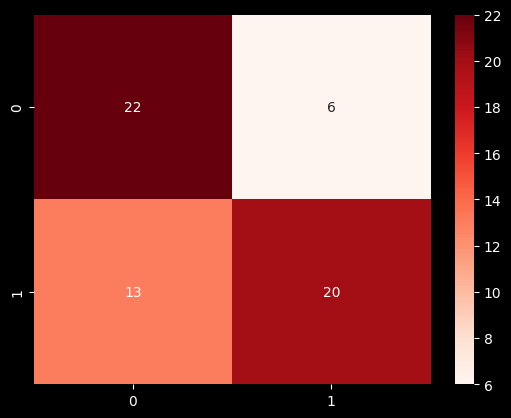

In [ ]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,cmap='Reds')

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.88      0.71      0.78        41

    accuracy                           0.79        76
   macro avg       0.80      0.80      0.79        76
weighted avg       0.81      0.79      0.79        76



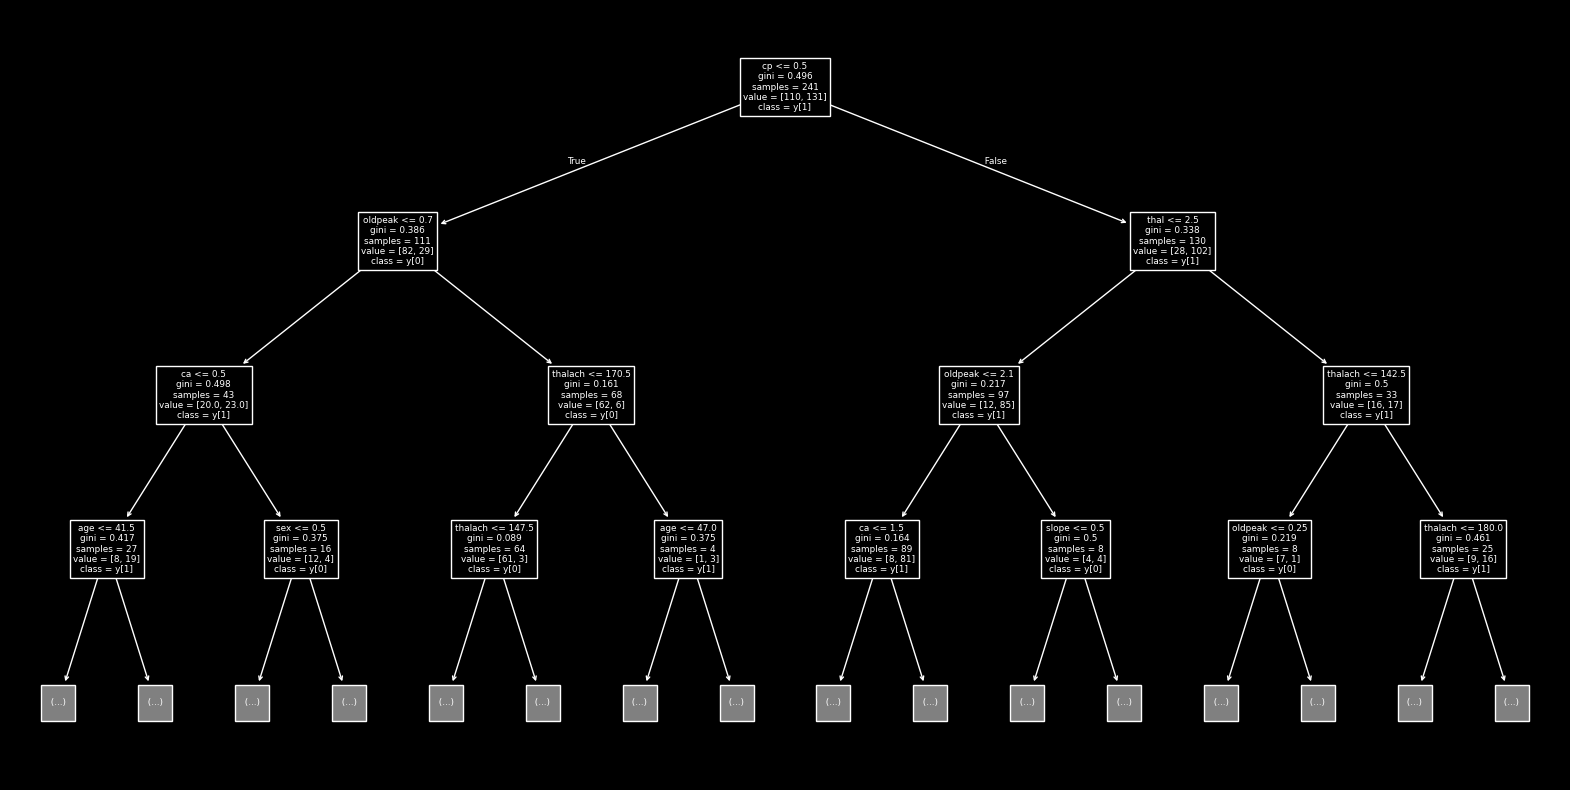

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=x_train.columns,filled=False,max_depth=3,class_names=True)
plt.show()
#max_depth-The maximum depth of the representation. If None, the tree is fully generated.
#feature_names-Names of each of the features. If None, generic names will be used (“x[0]”, “x[1]”, …).
#class_names-Names of each of the target classes in ascending numerical order. Only relevant for classification and not supported for multi-output.
#If True, shows a symbolic representation of the class name.
#filled-When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

In [ ]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Hyperparameter Tuning-GridSearchCV

In [ ]:
new=[55,1,2,115,300,1,1,155,0,2.2,0,0,1]

In [ ]:
new_data=pd.DataFrame(new)
new_data

,0
0,55.0
1,1.0
2,2.0
3,115.0
4,300.0
5,1.0
6,1.0
7,155.0
8,0.0
9,2.2


In [ ]:
new_data=new_data.T

In [ ]:
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,55.0,1.0,2.0,115.0,300.0,1.0,1.0,155.0,0.0,2.2,0.0,0.0,1.0


In [ ]:
#hyperparameter tuning-Finding the best parameters in a model inorder to attain higher accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[4,8,10],
    'min_samples_split':[2,4,6,8]
}

In [ ]:
hyper=GridSearchCV(model,params,cv=5) #model is the DecisionTree

In [ ]:
hyper.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
hyper.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 6}

In [ ]:
hyperModel=hyper.best_estimator_
hyperModel

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=4)

In [ ]:
y_pred=hyperModel.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8360655737704918